# Movies: Explortory Data Analysis

by Israel Diaz

<h3>03/14/2023: </h3>
Added more data to the analysis, years from 2000 to 2022


## Data Description

The data correspond to the one downloaded from [IMDB source](https://datasets.imdbws.com/).

**IMDb Dataset Details**

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

**title.akas.tsv.gz** - Contains the following information for titles:

* titleId (string) - a tconst, an alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* title (string) – the localized title
* region (string) - the region for this version of the title
* language (string) - the language of the title
* types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
* attributes (array) - Additional terms to describe this alternative title, not enumerated
* isOriginalTitle (boolean) – 0: not original title; 1: original title

**title.basics.tsv.gz** - Contains the following information for titles:

* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

**title.ratings.tsv.gz** – Contains the IMDb rating and votes information for titles

* tconst (string) - alphanumeric unique identifier of the title
* averageRating – weighted average of all the individual user ratings
* numVotes - number of votes the title has received

## Loading Data

### Import Libraries

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, json
import warnings
warnings.simplefilter('ignore')


## suppress scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

plt.style.use('ggplot')

### Load Data

I will load the data previously downloaded from tmdb using their api. I have retrieved years 2000 to 2022.

In [2]:
## Using glob to open the json files
FOLDER = 'data/full_data/'
q = FOLDER + "/**/*.json"
print(q)

file_list = sorted(glob.glob(q, recursive=True))
file_list

data/full_data//**/*.json


['data/full_data\\tmdb_api_results_2000.json',
 'data/full_data\\tmdb_api_results_2001.json',
 'data/full_data\\tmdb_api_results_2002.json',
 'data/full_data\\tmdb_api_results_2003.json',
 'data/full_data\\tmdb_api_results_2004.json',
 'data/full_data\\tmdb_api_results_2005.json',
 'data/full_data\\tmdb_api_results_2006.json',
 'data/full_data\\tmdb_api_results_2007.json',
 'data/full_data\\tmdb_api_results_2008.json',
 'data/full_data\\tmdb_api_results_2009.json',
 'data/full_data\\tmdb_api_results_2010.json',
 'data/full_data\\tmdb_api_results_2011.json',
 'data/full_data\\tmdb_api_results_2012.json',
 'data/full_data\\tmdb_api_results_2013.json',
 'data/full_data\\tmdb_api_results_2014.json',
 'data/full_data\\tmdb_api_results_2015.json',
 'data/full_data\\tmdb_api_results_2016.json',
 'data/full_data\\tmdb_api_results_2017.json',
 'data/full_data\\tmdb_api_results_2018.json',
 'data/full_data\\tmdb_api_results_2019.json',
 'data/full_data\\tmdb_api_results_2020.json',
 'data/full_d

Loading json files into pandas dataframe

In [3]:
data = pd.concat([pd.read_json(f) for f in file_list])
data

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.00,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,"10,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,"62,127.00",en,The Fantasticks,...,0.00,86.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.00,5.50,22.00,
2,tt0113092,0.00,None,None,0.00,"[{'id': 878, 'name': 'Science Fiction'}]",,"110,977.00",en,For the Cause,...,0.00,100.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.00,5.10,8.00,
3,tt0116391,0.00,None,None,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,"442,869.00",hi,Gang,...,0.00,152.00,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,,Gang,0.00,4.00,1.00,NaN
4,tt0118694,0.00,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,"150,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,843.00,cn,花樣年華,...,"12,854,953.00",99.00,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.00,8.11,"2,136.00",PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,tt9883664,0.00,None,None,0.00,[],,"1,031,225.00",en,Equally Friends,...,0.00,47.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Equally Friends,0.00,0.00,0.00,
3353,tt9893130,0.00,None,None,0.00,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",,"972,731.00",en,"2025: Blood, White & Blue",...,0.00,135.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,THE PURGE meets US,"2025: Blood, White & Blue",0.00,4.00,1.00,
3354,tt9893158,0.00,None,None,0.00,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",,"796,955.00",en,Clowning,...,0.00,96.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,0.00,8.00,1.00,
3355,tt9893160,0.00,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,None,0.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",,"606,303.00",en,No Way Out,...,0.00,89.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find what you love and let it kill you.,No Way Out,0.00,4.90,9.00,


In [4]:
# remove ids that are 0
data = data[data['imdb_id'] != 0]

In [5]:
print(f'Number of instances: {len(data)}')

Number of instances: 65437


### Export Data

In [6]:
data.to_csv(f'{FOLDER}tmdb_results_combined.csv.gz', compression='gzip', index=False)

## Exploratory Data Analysis

### Preprocessing

Before going forward with the visualization, I will need to do some preprocessing on the data

In [7]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
             'poster_path','status','tagline','id','homepage',
             'production_countries','video','production_companies','spoken_languages',
             'original_language']
data = data.drop(columns=drop_cols)
data

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
1,tt0113026,0.00,None,"10,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.34,2000-09-22,0.00,86.00,The Fantasticks,5.50,22.00,
2,tt0113092,0.00,None,0.00,"[{'id': 878, 'name': 'Science Fiction'}]",2.02,2000-11-15,0.00,100.00,For the Cause,5.10,8.00,
3,tt0116391,0.00,None,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.60,2000-04-14,0.00,152.00,Gang,4.00,1.00,NaN
4,tt0118694,0.00,None,"150,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",28.73,2000-09-29,"12,854,953.00",99.00,In the Mood for Love,8.11,"2,136.00",PG
5,tt0118852,0.00,None,0.00,"[{'id': 18, 'name': 'Drama'}]",4.52,2000-09-02,0.00,99.00,Chinese Coffee,6.80,49.00,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,tt9883664,0.00,None,0.00,[],0.84,2022-01-10,0.00,47.00,Equally Friends,0.00,0.00,
3353,tt9893130,0.00,None,0.00,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",4.87,2022-07-01,0.00,135.00,"2025: Blood, White & Blue",4.00,1.00,
3354,tt9893158,0.00,None,0.00,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",3.36,2022-03-13,0.00,96.00,Clowning,8.00,1.00,
3355,tt9893160,0.00,None,0.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",7.27,2022-08-12,0.00,89.00,No Way Out,4.90,9.00,


In [8]:
## checking certificaciont unique values
data['certification'].unique()

array(['', nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17', 'Unrated', '-',
       'UR', 'Not Rated', 'ScreamFest Horror Film Festival', 'PG-13 ',
       '10'], dtype=object)

I will need to homogenize all these values.

In [9]:
# fix empty space
data['certification'] = data['certification'].str.strip()

## fix certification
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
data['certification'] = data['certification'].replace(repl_cert)
data['certification'].value_counts(dropna=False)


NaN      26461
         23180
R         6517
NR        3665
PG-13     3422
PG        1542
G          477
NC-17      173
Name: certification, dtype: int64

### Return movies with budget or revenue greater than 0

In [10]:
filter = (data['budget'] > 0) | (data['revenue'] > 0)

print(f'Number of Instances: {len(data[filter])}')

Number of Instances: 14651


There are 14651 instances that hace budget or revenue greater than 0 in the year 2000. Ok Let's save it.

In [11]:
data_budget = data[filter].copy()

### Movies per certification categories (G/PG/PG-13/R)

In [12]:
cert = data_budget[['certification', 'imdb_id']].groupby(by='certification').count().sort_values(by='imdb_id',ascending=False)
cert

,imdb_id
certification,
,3868
R,3371
PG-13,2098
NR,1069
PG,838
G,165
NC-17,38


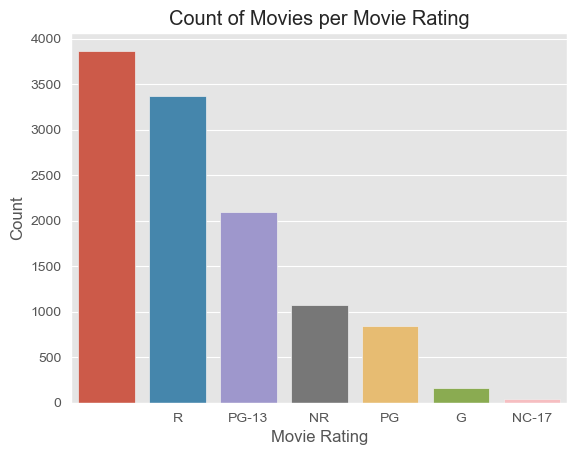

<Figure size 640x480 with 0 Axes>

In [13]:
sns.barplot(data=cert, x=cert.index, y='imdb_id').set(title='Count of Movies per Movie Rating', xlabel='Movie Rating', ylabel='Count')
plt.show()
plt.savefig('img/count_rating.png')

Rated-R movies are by far the ones that most produced in the year 2000

### Revenue per certification category

In [14]:
revenue = data_budget[['certification', 'revenue']].groupby(by='certification').mean().sort_values(by='revenue',ascending=False)
revenue

,revenue
certification,
PG,"122,764,623.04"
PG-13,"118,045,452.98"
G,"88,907,322.56"
R,"30,633,941.27"
,"7,391,268.18"
NR,"6,414,370.16"
NC-17,"5,321,470.13"


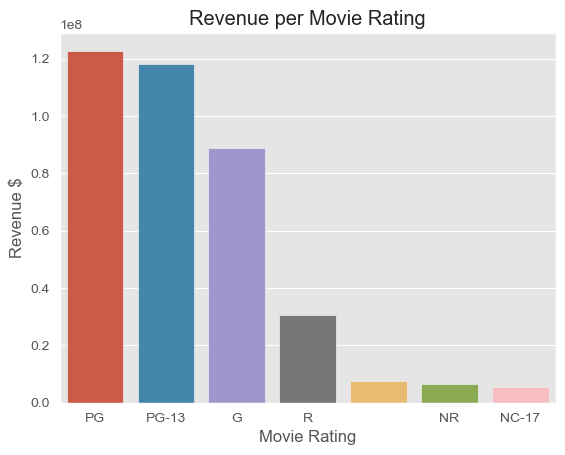

<Figure size 640x480 with 0 Axes>

In [15]:
sns.barplot(data=revenue, x=revenue.index, y='revenue').set(title='Revenue per Movie Rating', xlabel='Movie Rating', ylabel='Revenue $')
plt.show()
plt.savefig('img/revenue_rating.png')

### Average budget per certification category

In [16]:
budget = data_budget[['certification', 'budget']].groupby(by='certification').mean().sort_values(by='budget',ascending=False)
budget

,budget
certification,
PG,"41,078,169.75"
PG-13,"40,220,434.65"
G,"30,356,193.28"
R,"14,529,060.32"
,"3,480,097.24"
NC-17,"3,181,185.55"
NR,"2,779,664.98"


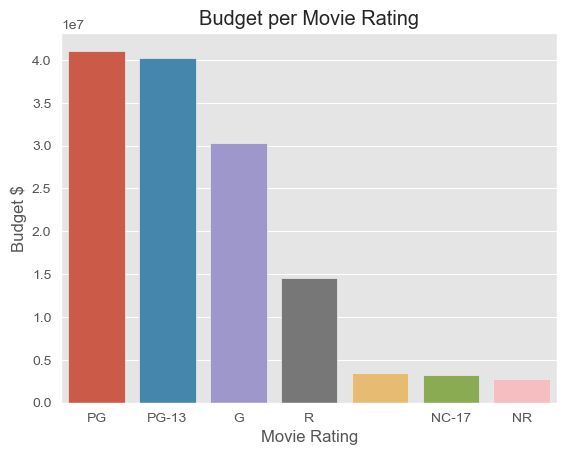

<Figure size 640x480 with 0 Axes>

In [17]:
sns.barplot(data=budget, x=budget.index, y='budget').set(title='Budget per Movie Rating', xlabel='Movie Rating', ylabel='Budget $')
plt.show()
plt.savefig('img/budget_rating.png')